## 1.-Implementar el método de Euler implicito como quieran

In [54]:
#=Necesitaremos el método de Newton, asi que anexamos el código de la función que creamos en una tarea anterior. =#
x=Sym("x")
function newtonMethod2(f::Function,seed)
    derPy =simplify(diff(f),[x])
    der = lambdify(derPy,[x])
    MAX_N = 200
    valor = seed
    iteraciones = 0
    
    while(abs(f(valor))>0.00001)
        if(iteraciones<MAX_N)
            valor=valor-(f(valor)/der(valor))
            iteraciones+=1
            
        else
            println("demasiadas iteraciones, es posible que no converja")
           break 
        end
    end    
    return valor
end

newtonMethod2 (generic function with 1 method)

In [55]:
#=Tambien como en la tarea pasada vamos a hacer una funcion que nos regrese el último elemento de un arreglo=#
function last(A)
   return A[length(A)] 
end

last (generic function with 1 method)

In [56]:

using SymPy

function implicitEuler(f::Function,t0::Float64,tf::Float64,x0::Float64,delta::Float64)
    #=Definimos la funcion que meteremos al método de Newton para aproximar el siguiente punto. a, se sustituira por el punto previo. =#

    a = Sym("a")
    t=Sym("t")
    g(x,t,a) = x-(f(x,t)*delta)-a
    
    
    xArray=[]
    tArray=[]
    newX = 0
    
    #=Se agregan las condiciones iniciales a los arreglos. =#
    
    push!(tArray,t0)
    push!(xArray,x0)
    
    while(last(tArray)<tf)
        
        #Se aproxima el punto siguiente ocn el método de Newton y se guarda en la variable newX
        
        newX = newtonMethod2(x->subs(g(x,t,a),t=>last(tArray),a=>last(xArray)),last(xArray))
        
        #=Una vez que se tiene el X nuevo agregamos el nuevo punto calculado con euler al arreglo x=#
        
        push!(xArray,last(xArray)+f(newX,last(tArray)+delta)*delta)
        push!(tArray,last(tArray)+delta)
    end
    
    return [tArray,xArray]
end

implicitEuler (generic function with 1 method)

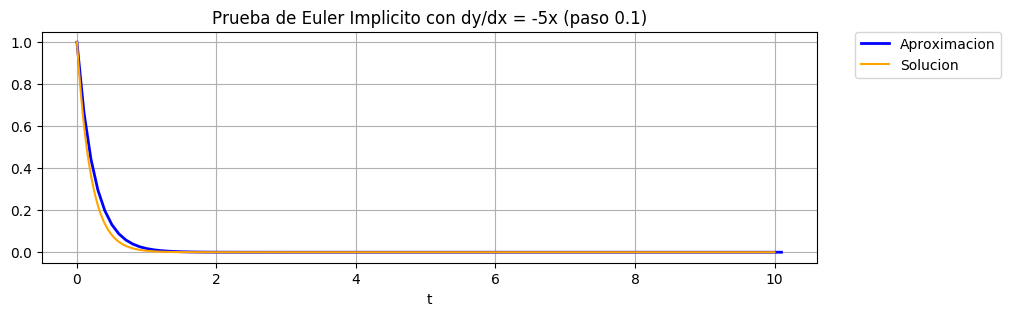

In [57]:
solucion = implicitEuler((x,t)->-5*x,0.,10.,1.,0.1)
solRealX = linspace(0,10,1000)
y(x) = e^(-5*x)
solRealY = y.(solRealX)

using PyPlot
plt = PyPlot
plt.figure(figsize=(10, 3))
plt.xlabel("t")
plt.title("Prueba de Euler Implicito con dy/dx = -5x (paso 0.1)")
plt.grid()
plt.plot(solucion[1],solucion[2],color = "blue",label = "Aproximacion",linewidth =2)    
#Gráfico de error
plt.plot(solRealX,solRealY,color = "orange",label = "Solucion")
legend(bbox_to_anchor=[1.05,1],loc=2,borderaxespad=0)    
plt.show()

## 2.-Implementar Euler Regla del punto medio. 

In [58]:
function eulerMidPoint(f::Function,t0::Float64,tf::Float64,x0::Float64,delta::Float64)
    
   #=Es basicamente lo mismo que Euler, solo que ahora, vamos a evaluar la derivada en el ounto medio. En realidad es innecesario guardar el x del punto medio en una variable, sin embargo, con el propósito de que las expresiones para agregar los puntos nuevos se vean menos engorrosas lo haremos asi.=# 
    
    tArray = []
    xArray = []
    
    push!(tArray,t0)
    push!(xArray,x0)
    xMiddle = 0
    
    while(last(tArray)<tf)
        #=Se aproxima x a la mitad del intervalo=#
        xMiddle =last(xArray) +f(last(xArray),last(tArray))*(delta/2)
        
        #=Se agregan los nuevos puntos=#
        push!(xArray,last(xArray)+f(xMiddle,last(tArray)+(delta/2))*delta)
        push!(tArray,last(tArray)+delta)
    end
    return [tArray,xArray]
end

eulerMidPoint (generic function with 1 method)

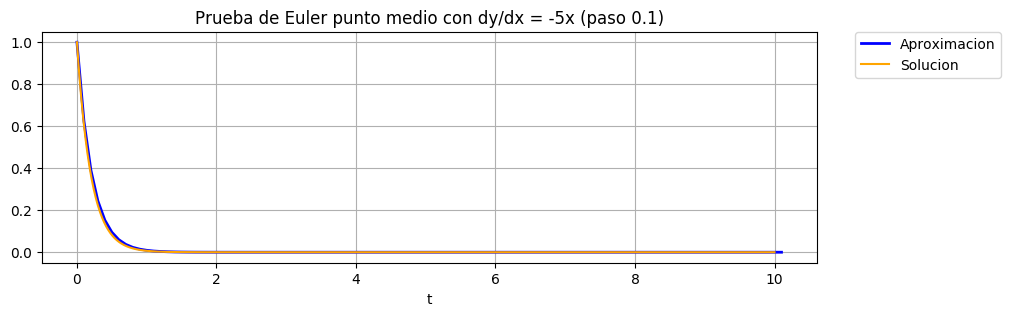

In [59]:
#=Corroboremos el método con la misma funcion dy/dx = -5x=#

solucion = eulerMidPoint((x,t)->-5*x,0.,10.,1.,0.1)
solRealX = linspace(0,10,1000)
y(x) = e^(-5*x)
solRealY = y.(solRealX)

using PyPlot
plt = PyPlot
plt.figure(figsize=(10, 3))
plt.xlabel("t")
plt.title("Prueba de Euler punto medio con dy/dx = -5x (paso 0.1)")
plt.grid()
plt.plot(solucion[1],solucion[2],color = "blue",label = "Aproximacion",linewidth =2)    
#Gráfico de error
plt.plot(solRealX,solRealY,color = "orange",label = "Solucion")
legend(bbox_to_anchor=[1.05,1],loc=2,borderaxespad=0)    
plt.show()


## 3.-Implementar Runge Kutta de orden 4

In [60]:
function rungeKutta4(f::Function,t0,tf,x0,delta)
    tArray = []
    xArray = []
    
    #=Como siempre agregamos los primeros puntos a los arreglos=#

    push!(tArray,t0)
    push!(xArray,x0)
    
    #=Definimos las funciones de Runge Kutta=#
    
    f1(x,t) = f(x,t)
    f2(x,t) = f(x+(delta/2)*f1(x,t),t+(delta/2))
    f3(x,t) = f(x+(delta/2)*f2(x,t),t+(delta/2))
    f4(x,t) = f(x+(delta)*f3(x,t),t+delta)
    
    rungeFunction(x,t) = x+(delta/6)*(f1(x,t)+2*f2(x,t) +2*f3(x,t)+f4(x,t))
    
    while(last(tArray)<tf)
        push!(xArray,rungeFunction(last(xArray),last(tArray)))
        push!(tArray,last(tArray)+delta)
        
    end
    
    return [tArray,xArray]
    
end

rungeKutta4 (generic function with 1 method)

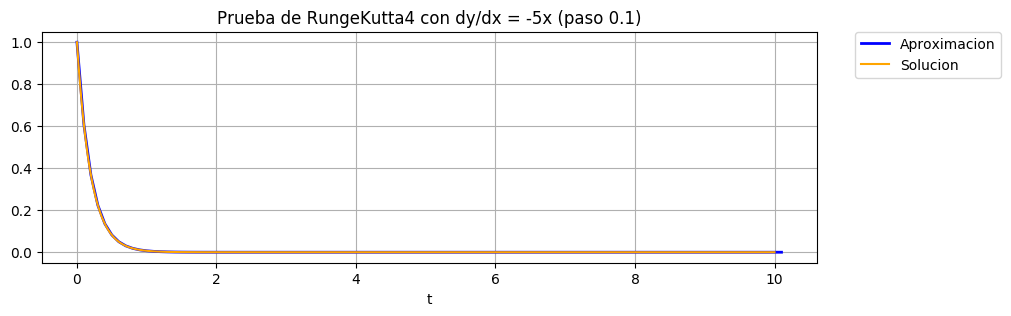

In [61]:
solucion = rungeKutta4((x,t)->-5*x,0.,10.,1.,0.1)
solRealX = linspace(0,10,1000)
y(x) = e^(-5*x)
solRealY = y.(solRealX)

using PyPlot
plt = PyPlot
plt.figure(figsize=(10, 3))
plt.xlabel("t")
plt.title("Prueba de RungeKutta4 con dy/dx = -5x (paso 0.1)")
plt.grid()
plt.plot(solucion[1],solucion[2],color = "blue",label = "Aproximacion",linewidth =2)    
#Gráfico de error
plt.plot(solRealX,solRealY,color = "orange",label = "Solucion")
legend(bbox_to_anchor=[1.05,1],loc=2,borderaxespad=0)    
plt.show()


## 4.- Repita el ejercicio 1 del notebook anterior (Julia_6) y discuta los resultados respecto a lo que obtuvo con el método implícito.

In [62]:
#=Copiamos nuestra función para poder hacer la comparacion entre los métodos implicito y explicito=#
function metodoEuler(derivada::Function,x0,xf,y0,h)
    
    listaX = []
    listaY = []
    
    #Agreagamos los primeros elementos a las listas 
    
    push!(listaX,x0)
    push!(listaY,y0)
    
    #=Mientras no se llegue al ultimo elemento se seguiran agregando elementos a las listas. Aqui tambien se podria haber calculado el número de pasos para llegar a xf como n = (xf-x0)/h y luego implementado un for de 1 a n, pero en realidad, es lo mismo, y además si hacemos lo anterior hay que redondear a k al entero menor. i.e. debemos ocupar mas espacio para almacenar a n , y hacer mas operaciones de tiempo constante. =#
    
    while(last(listaX)<xf)
        
        push!(listaY,last(listaY) + derivada(last(listaY),last(listaX))*h)
        push!(listaX,last(listaX)+h)
    end
    
    return [listaX,listaY]
    
end

metodoEuler (generic function with 1 method)

In [63]:
#=Hacemos una funcion que nos arroje todo=#

function methodsComparing(derivada::Function,solucion::Function,x0,xf,condicionesIniciales,pasos)
    
    eulerArreglo=[]
    xSolucion = []
    ySolucion=[]
    solucionImplicitaArreglo = []
    numPlot = 1
    numberOfPlots = length(condicionesIniciales)*length(pasos)
    
    for i in 1:length(condicionesIniciales)
        for j in 1:length(pasos)
            eulerArreglo = metodoEuler(derivada,x0,xf,condicionesIniciales[i],pasos[j])
            solucionImplicitaArreglo = implicitEuler(derivada,x0,xf,condicionesIniciales[i],pasos[j])
            xSolucion = eulerArreglo[1]
            ySolucion = condicionesIniciales[i]*solucion.(xSolucion)
            plt.figure(figsize=(15, 20))
            plt.subplot(numberOfPlots,1,numPlot)
            plt.xlabel("x")
            plt.title("Euler cond. inicial: $(condicionesIniciales[i]) Paso: $(pasos[j])")
            plt.grid()
            plt.plot(eulerArreglo[1],eulerArreglo[2],color = "blue",label = "Euler explícito")
            plt.plot(solucionImplicitaArreglo[1],solucionImplicitaArreglo[2],color = "pink",label="Euler implícito")
            plt.plot(xSolucion,ySolucion,color = "orange",label = "Solucion")
            legend(bbox_to_anchor=[1.05,1],loc=2,borderaxespad=0)
    
            plt.show()
            numPlot+=1
        end 
    end 
end 

methodsComparing (generic function with 1 method)

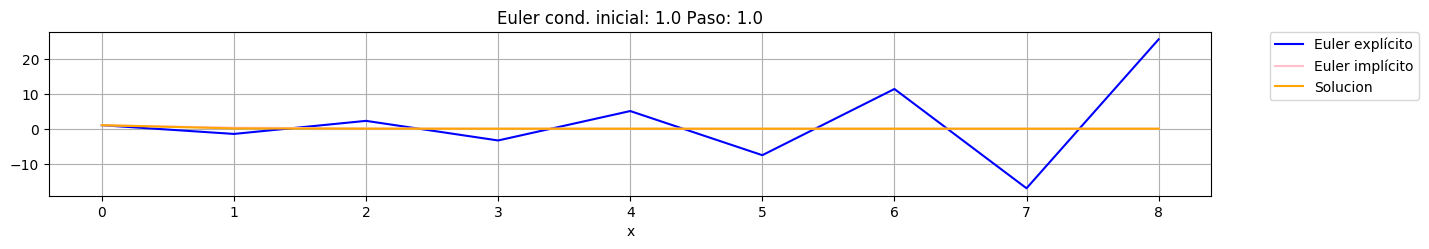

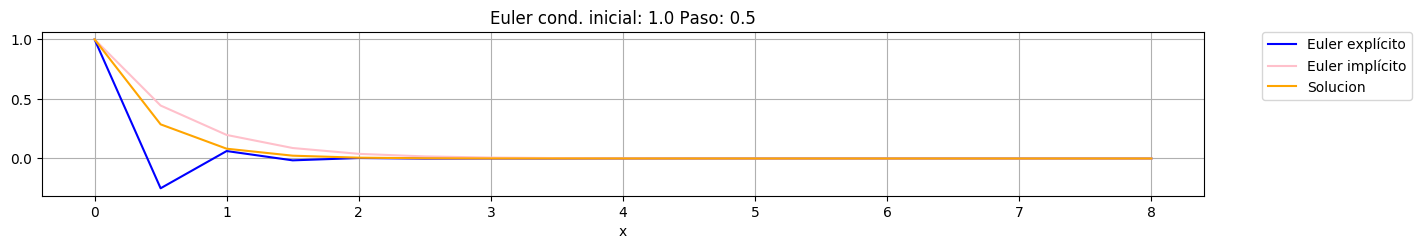

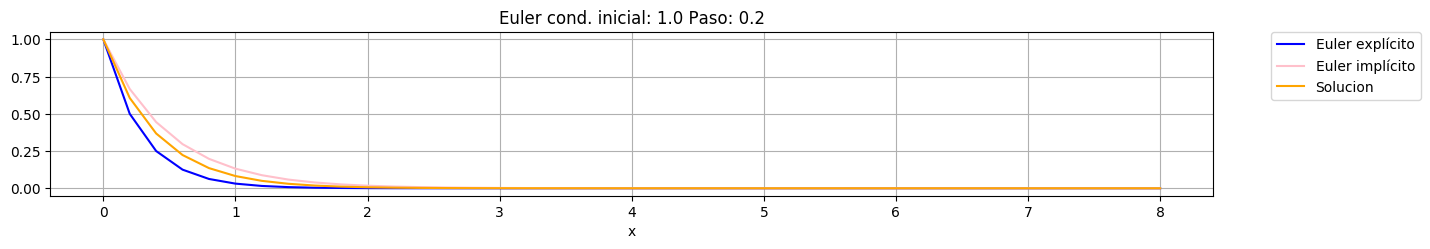

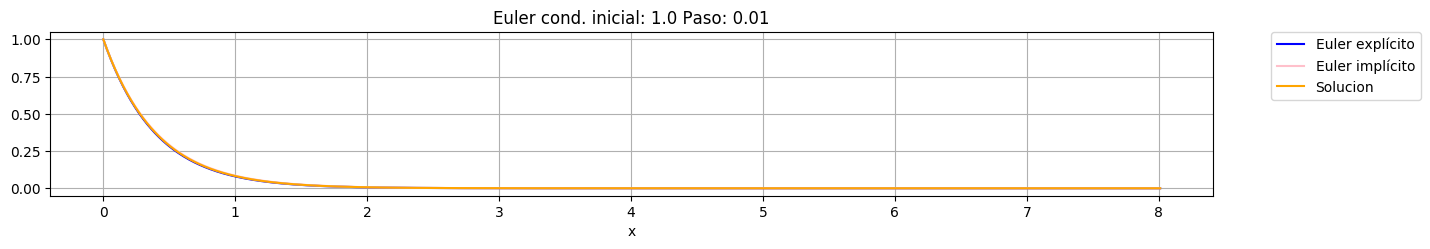

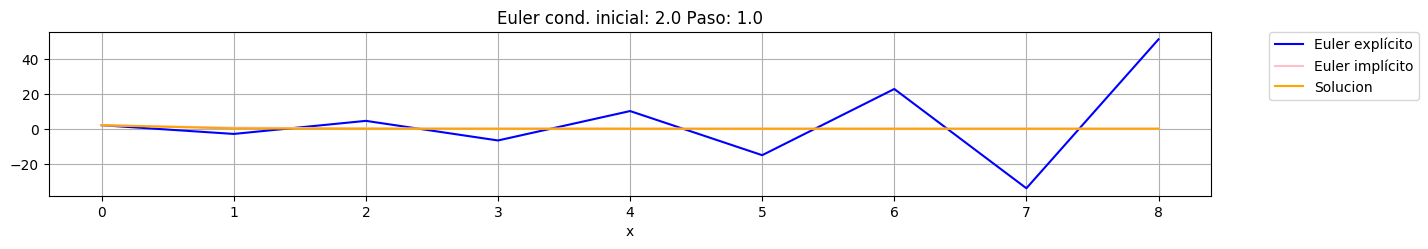

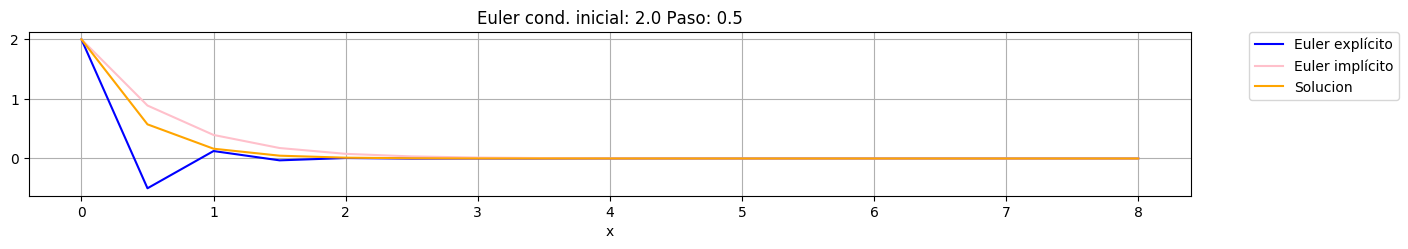

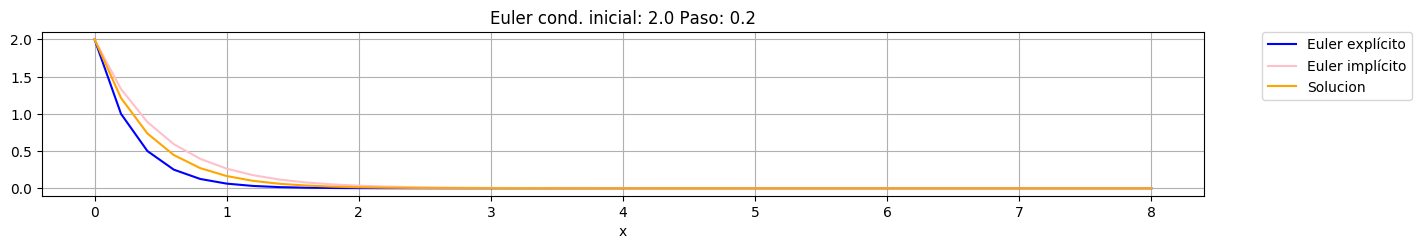

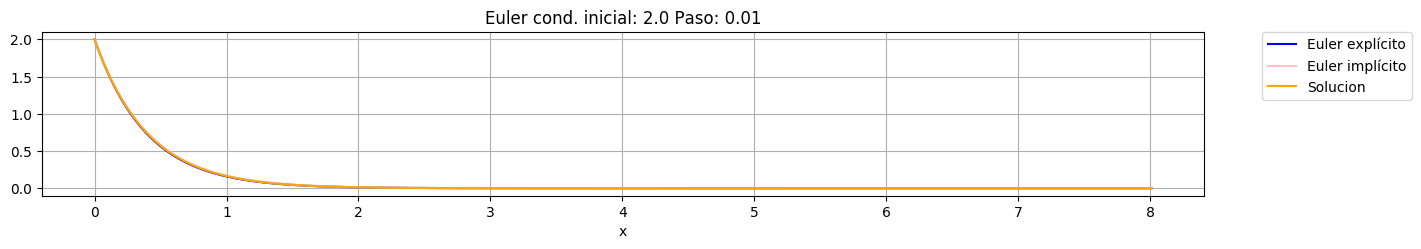

In [64]:
condicionesIniciales = [1.0,2.0]
pasos = [1.0,0.5,0.2,0.01]

methodsComparing((y,x)->-2.5*y,x->e^(-2.5*x),0.,8.,condicionesIniciales,pasos)


En todas las gráficas que se han mostrado anteriormente puede observarse que la solución aproximada por el método implicito de Euler esta mas cercana a la solución que la aproximación obtenida por el método explicito. Esto sin embargo podría variar de función a función, en este caso particular da la casualidad  que evaluar la derivada en el punto extremo del intervalo resulta en una mejor aproximación que tomarla en el punto del inicio. En general ambos métodos producen un error similar( $\mathcal{O}(h^2)$ en los peores casos). 

## Ejercicio 5: Usar el método del punto medio y de Runge-Kutta para resolver la ecuación: $$\frac{dx}{dt}=\frac{2x-18 t}{1+t}.$$ Compare su respuesta con la solución exacta: $4+8t-5t^2$. notén que $x(0)=4$.

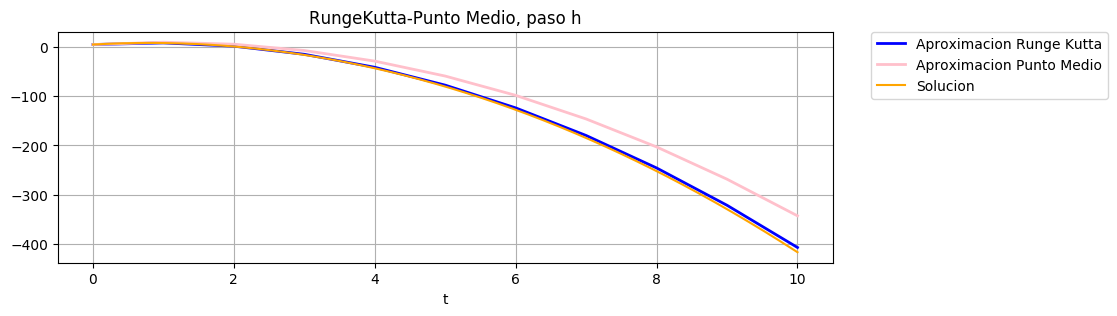

In [65]:
solucionRunge = rungeKutta4((x,t)->(2*x-18*t)/(1+t),0.,10.,4.,1.)
solucionMedio = eulerMidPoint((x,t)->(2*x-18*t)/(1+t),0.,10.,4.,1.)
solRealX = linspace(0,10,1000)
y(x) = 4+8*x-5*x^2
solRealY = y.(solRealX)
using PyPlot
plt = PyPlot
plt.figure(figsize=(10, 3))
plt.xlabel("t")
plt.title("RungeKutta-Punto Medio, paso h")
plt.grid()
plt.plot(solucionRunge[1],solucionRunge[2],color = "blue",label = "Aproximacion Runge Kutta",linewidth =2)    
#Gráfico de error
plt.plot(solucionMedio[1],solucionMedio[2],color = "pink",label = "Aproximacion Punto Medio",linewidth =2) 
plt.plot(solRealX,solRealY,color = "orange",label = "Solucion")
legend(bbox_to_anchor=[1.05,1],loc=2,borderaxespad=0)    
plt.show()


Usar un paso grande (h=1) deja ver que la aproximación por Runge Kutta tiene menor error que la de punto medio. 

## Ejercicio 6: Grafique la energía total del oscilador harmonico usando los métodos explícito de Euler y Runge-Kutta de orden 4. Compare sus respuestas y discuta.

En realidad ni siquiera es necesario hacer una función de Runge Kutta multivariable. Con la que tenemos basta. Tambien el de Euler que ya teniamos será suficiente. 

Repasemos brevemente el planteamiento. haciamos

\begin{aligned}
\frac{dx}{dt}&=u\\
\frac{du}{dt}&=-kx\\
\end{aligned}

y quedaba $$\frac{d\vec{x}}{dt} = f(\vec{x},t) = (x_{1},-kx_{2})$$

Donde $x_1 = u$ es la primera componente del vector $\vec{x}$ y $x_2 = x$ es la segunda componente del vector $\vec{x}$

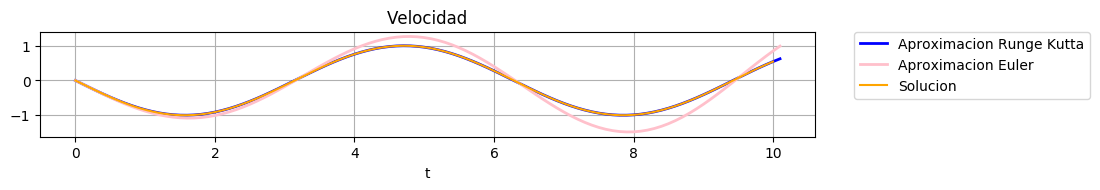

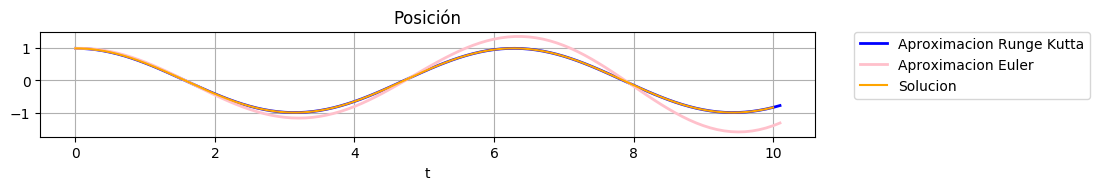

In [53]:
#=Si queremos entonces plantear el problema anterior con k = 1, velocidad inicial 0 y posición inicial 1=#

condicionesIniciales = [1,0]

#La funcion que le pasaremos a la funcion es 

f(x,t) = [x[2],-x[1]]
#=Y eso seria todo, ahora apliquemos los dos metodos, euler y runge, para resolver y guardemos en arreglos=#
xCord(x) = x[1]
yCord(x) = x[2]
rungeSoluciones = rungeKutta4(f,0.,10.,condicionesIniciales,0.1)
eulerSoluciones = metodoEuler(f,0.,10.,condicionesIniciales,0.1)

#=Por las condiciones iniciales que estamos dando y por que elegimos k = 1 y m=1, es claro que la solucion es simplemente cos(x) para la posicion y d(cos(x))/dx = -sin(x) para la velocidad=#
solRealX = linspace(0,10,1000)
y1(x) = cos(x)
y2(x) = -sin(x)
solPosicion = y1.(solRealX)
solVelocidad = y2.(solRealX)

#=Graficamos=#
using PyPlot
plt = PyPlot
plt.figure(figsize=(10, 3))
plt.subplot(2,1,1)
plt.xlabel("t")
plt.title( "Velocidad")
plt.grid()
plt.plot(rungeSoluciones[1],yCord.(rungeSoluciones[2]),color = "blue",label = "Aproximacion Runge Kutta",linewidth =2)    
plt.plot(eulerSoluciones[1],yCord.(eulerSoluciones[2]),color = "pink",label = "Aproximacion Euler",linewidth =2) 
plt.plot(solRealX,solVelocidad,color = "orange",label = "Solucion")
legend(bbox_to_anchor=[1.05,1],loc=2,borderaxespad=0)    
plt.show()

plt.figure(figsize=(10, 3))
plt.subplot(2,1,2)
plt.xlabel("t")
plt.title("Posición")
plt.grid()
plt.plot(rungeSoluciones[1],xCord.(rungeSoluciones[2]),color = "blue",label = "Aproximacion Runge Kutta",linewidth =2)    
plt.plot(eulerSoluciones[1],xCord.(eulerSoluciones[2]),color = "pink",label = "Aproximacion Euler ",linewidth =2) 
plt.plot(solRealX,solPosicion,color = "orange",label = "Solucion")
legend(bbox_to_anchor=[1.05,1],loc=2,borderaxespad=0)    
plt.show()

